In [1]:
%matplotlib inline
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
locations = pd.read_csv('C3S/ERA5/simplemaps-worldcities-basic-with-index.csv',
        index_col = ['city_id'] )
print(locations.head())

                  city   city_ascii        lat        lng       pop  \
city_id                                                               
1        Qal eh-ye Now    Qal eh-ye  34.983000  63.133300    2997.0   
2          Chaghcharan  Chaghcharan  34.516701  65.250001   15000.0   
3          Lashkar Gah  Lashkar Gah  31.582998  64.360000  201546.0   
4               Zaranj       Zaranj  31.112001  61.886998   49851.0   
5           Tarin Kowt   Tarin Kowt  32.633298  65.866699   10000.0   

             country iso2 iso3 province  
city_id                                  
1        Afghanistan   AF  AFG  Badghis  
2        Afghanistan   AF  AFG     Ghor  
3        Afghanistan   AF  AFG  Hilmand  
4        Afghanistan   AF  AFG   Nimroz  
5        Afghanistan   AF  AFG  Uruzgan  


In [3]:
city = 'Reading'
locations[locations['city_ascii'].str.contains(city)]

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
city_id,,,,,,,,,
6257,Reading,Reading,51.469971,-0.980028,257752.0,United Kingdom,GB,GBR,Oxfordshire


In [7]:
city_id = 6257 # Reading
param = '2t'
x = []
y = []

In [8]:
for year in range(2008, 2018):
    path = 'C3S/ERA5/era5-sample-data_final_%d.csv' % year
    data_ = pd.read_csv(path)
    for month in range(1, 13):
        year_and_month = year * 100 + month
        x.append(date(year, month, 15))
        data = data_.loc[(data_['city_id'] == city_id)
                & (data_['month'] == year_and_month)]
        #print('%d: %f' % (year_and_month, data[param] - 273.15))
        y.append(data.iloc[0][param] - 273.15)

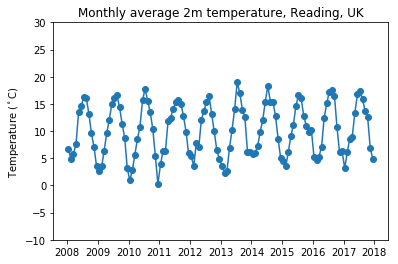

In [9]:
fig, ax = plt.subplots()
ax.set_ylim([-10, 30])
ax.set_ylabel('Temperature ($^\circ$C)')
ax.plot_date(x, y, '-o')
plt.title('Monthly average 2m temperature, Reading, UK')
plt.show()